<h1><center>In the name of God</center></h1>

In [61]:
using  Plots, LinearAlgebra, GLM, Optim, DataFrames, StatFiles, Distributions, Roots, KernelDensity, BlackBoxOptim, Random
pyplot();

# Monte-Carlo Simulation of firm's behavior in exportation

## 1 Setup a firm's problem

In this case, the company faces two problems.
First, it solves the problem of the domestic market. In this case, if its profit is negative, it will not produce at all. If the firm's profit is positive in this problem, the firm will seek to solve the second problem.
In the second problem, the firm will resolve the problem when it can export. If its profit is negative, it will not export. If its profit is positive, it will export.
It should be noted that in the case of exports, we must compare the amount of profits in the domestic market and the export market. If sales only in the domestic market are more profitable for the firm than sales in both domestic and foreign markets, then the firm will produce in the domestic market.

In the first problem we have as in the fifth exercise:
First of all, to simplify the problem we solve the cost minimization problem for the firm. (our goal is to get rid of L :))
To reach our aim we have two ways:
1) from the question's assumptions we have:
$$
y=Al^{\alpha}
$$
so we can easily simplify the equation and then we have:
$$
l^{*} = {(\frac{y}{A})}^{\frac{1}{\alpha}}
$$

2) we can classically solve the CMP:

$$
\min{wl + f_0}
\\
s.t. y <= Al^{\alpha}
\\
\\
\Rightarrow Lagrangian = -wl - f_0 + \lambda (Al^{\alpha} - y)
\\
\Rightarrow [l]: -w+\lambda(\alpha Al^{\alpha -1})
\\
\Rightarrow l^{*} = (\frac{w}{\lambda \alpha A})^{{\frac{1}{\alpha -1}}}
$$
with some algebra ...:
$$
\Rightarrow l^{*} = {(\frac{y}{A})}^{\frac{1}{\alpha}}
$$
So, to set up the firm's problem we want to set up the profit function:
$$
\pi = total \ revenu - total \ cost
\\
\pi = py - (wl^{*}+f_0)
\\
\pi = py - (w{(\frac{y}{A})}^{\frac{1}{\alpha}}+f_0)
$$
Now we can set up a profit maximization problem for the firm:
$$
\max: py - (w{(\frac{y}{A})}^{\frac{1}{\alpha}}+f_0)
\\
s.t. \ y = Y(\frac{p}{P})^{-\sigma}
$$


If the firm has a positive profit by solving this problem, this time we must solve the second problem as well

in the second problem we have:
$$
Total Cost    = \omega l + f_0 + f_x 
$$

$$
Total Revenue = p_d y_d + (1 - \tau) p_x y_x
$$

$$
\pi = p_d y_d + (1 - \tau) p_x y_x - (\omega l + f_0 + f_x )
$$

$$
A (l^*)^{\alpha} = y_X + y_d \Rightarrow l^* = (\frac{y_x + y_d}{A})^{\frac{1}{\alpha}}
$$

$$
y_d = Y(\frac{p_d}{P})^{-\sigma}
$$

$$
y_x = Y(\frac{p_x}{P})^{-\sigma}
$$

$$
$$

so we must solve this problem:
$$
\max: p_d y_d + (1 - \tau) p_x y_x - (\omega l + f_0 + f_x )
\\
s.t. \ y_x + y_d = Y(\frac{p_x}{P})^{-\sigma} + Y(\frac{p_d}{P})^{-\sigma}
$$

in this case the firm's profit is:
$$
\pi = p_d \; \underbrace{Y \; (\frac{p_d}{P})^{-\sigma}}_{y_d} + (1 - \tau) \; p_x \; \underbrace{Y \; (\frac{p_x}{P})^{-\sigma}}_{y_x} - \underbrace{\; \; \;Cost \;(y_d \; , \; y_x) \; \; \;}_{\omega \underbrace{\; \; \; l \; \; \;}_{ (\frac{\overbrace{\; \; \; y_x \; \; \; }^{Y(\frac{p_x}{P})^{-\sigma}} + \overbrace{\; \; \; y_d \; \; \;}^{Y(\frac{p_d}{P})^{-\sigma}}}{A})^{\frac{1}{\alpha}}} + \; \; f_0 \; \; + \; \; f_x}
$$


## 2 Solve for the the firm's price

for the first problem as we know from pset5 we have:
We can rewrite the problem as below:
$$
\max: py - Cost(y)
\\
s.t. \ y = Y(\frac{p}{P})^{-\sigma}
$$
Now we want to solve the problem for price. we can easily get derivative from objective function with respect to price. 
$$
\Rightarrow \ y + p\frac{dy}{dp} - \frac{dy}{dp}Cost^{'}(y) = 0 
$$
We remember from microeconomics that term $\frac{\frac{dy}{y}}{\frac{dp}{p}}$ is equal to price elasticity of demand.
So with some algebraic calculation, we have:
$$
\Rightarrow \ y \ (1+\frac{\frac{dy}{y}}{\frac{dp}{p}}-\frac{\frac{dy}{y}}{\frac{dp}{p}}\frac{Cost^{'}(y)}{p} ) =0 
$$
From the functional form $y = Y(\frac{p}{P})^{-\sigma}$ we know that the price elasticity of demand is equal to $-\sigma$.
obvously we can calculate the term $\frac{\frac{dy}{y}}{\frac{dp}{p}}$ from the  $y = Y(\frac{p}{P})^{-\sigma}$ and see the result.

So, we can rewrite the derivative as below:
$$
y \ (1-\sigma - Cost^{'}(y) \frac{-\sigma}{p}) = 0
$$
with sum algebraic calculation we have:
$$
p^{*} \ = \ \frac{\sigma}{\sigma -1} Cost^{'}(y)
$$

Also, we can rewrite the $p^*$ with substitution of $Cost^{'}(y)$ as below:
$$
Cost^{'}(y) = \frac{w}{a}(\frac{1}{A})^{\frac{1}{\alpha}} \ y^{\frac{1-\alpha}{\alpha}}
$$
We know that $y = Y(\frac{p}{P})^{-\sigma}$
So:
$$
p^{*} = \frac{\sigma}{\sigma -1} \frac{w}{a}(\frac{1}{A})^{\frac{1}{\alpha}} \ ({Y(\frac{p}{P})^{-\sigma}})^{\frac{1-\alpha}{\alpha}}
\\
\\
p^{*} = (\frac{\sigma}{\sigma -1}) (\frac{w}{a})(\frac{1}{A})^{\frac{1}{\alpha}} (Y^{\frac{1-\alpha}{\alpha}}) (P^{\frac{\sigma - \alpha \sigma}{\alpha}}) ({p^*}^{\frac{{\sigma \alpha - \sigma}}{\alpha}})
\\
\\
p^{*} = {((\frac{\sigma}{\sigma -1}) (\frac{w}{a})(\frac{1}{A})^{\frac{1}{\alpha}} (Y^{\frac{1-\alpha}{\alpha}}) (P^{\frac{\sigma - \alpha \sigma}{\alpha}}))}^{\frac{\alpha}{\alpha -\sigma \alpha -\sigma}}
$$


for the second problem we have:

$$
\frac{\partial \pi}{\partial p_d} \; = 0
$$
$$
\frac{\partial \pi}{\partial p_x} \; = 0
$$

so we have:

$$
(1-\sigma)YP^\sigma (p_d)^{-\sigma} - w(\frac{YP^\sigma}{A})^{(\frac{1}{\alpha})} \frac{1}{\alpha}((p_d)^{-\sigma} + (p_x)^{-\sigma})^{\frac{1-\alpha}{\alpha}} (-\sigma) ((p_d)^{-\sigma -1}) =0
$$
and

$$
(1-\tau)(1-\sigma)YP^\sigma (p_x)^{-\sigma} - w(\frac{YP^\sigma}{A})^{(\frac{1}{\alpha})} \frac{1}{\alpha}((p_d)^{-\sigma} + (p_x)^{-\sigma})^{\frac{1-\alpha}{\alpha}} (-\sigma) ((p_x)^{-\sigma -1}) =0
$$
It does not seem that we can reach a closed-form for the price. but with some algebra we can find that:
$$
\frac{p_x}{p_d} = \frac{1}{1-\tau}
$$

## 3 Determine the threshod $A_0$ the a firm enters the dommestic market.

We can calculate the threshold of $A_0$ by solving the $\pi = 0 $ equation.
$$
\Rightarrow \pi = py - (w{(\frac{y}{A})}^{\frac{1}{\alpha}}+f_0) \ = \ 0
\\
\Rightarrow py = w{(\frac{y}{A})}^{\frac{1}{\alpha}}+f_0
\\
\Rightarrow py - f_0 = w{\frac{y^{\frac{1}{\alpha}}}{A^{\frac{1}{\alpha}}}}
\\
\Rightarrow \frac{py - f_0}{w y^{\frac{1}{\alpha}}} = \frac{1}{A^{\frac{1}{\alpha}}}
\\
\Rightarrow (\frac{py - f_0}{w y^{\frac{1}{\alpha}}})^{{\alpha}} = \frac{1}{A}
\\
\Rightarrow A = (\frac{w y^{\frac{1}{\alpha}}}{py - f_0})^{{\alpha}}
\\
\Rightarrow A = \frac{w^{{\alpha}} y}{({py - f_0})^{{\alpha}}}
$$


## 4 Determine the threshod $A_x$ the a firm enters the export market.

We can calculate the threshold of $A_x$ by solving the $\pi = 0 $ equation.
$$
\Rightarrow \pi = p_d \; \underbrace{Y \; (\frac{p_d}{P})^{-\sigma}}_{y_d} + (1 - \tau) \; p_x \; \underbrace{Y \; (\frac{p_x}{P})^{-\sigma}}_{y_x} - \underbrace{\; \; \;Cost \;(y_d \; , \; y_x) \; \; \;}_{\omega \underbrace{\; \; \; l \; \; \;}_{ (\frac{\overbrace{\; \; \; y_x \; \; \; }^{Y(\frac{p_x}{P})^{-\sigma}} + \overbrace{\; \; \; y_d \; \; \;}^{Y(\frac{p_d}{P})^{-\sigma}}}{A})^{\frac{1}{\alpha}}} + \; \; f_0 \; \; + \; \; f_x}
 \ 0
$$

$$
\Rightarrow A_x \; = \; [\frac{\omega (y_d \; + \; y_x)^{\frac{1}{\alpha}}}{p_dy_d + (1-\tau)p_x y_x -f_0 - f_x}]^\alpha 
$$
or:
$$
\Rightarrow A_x \; = \; [\frac{\omega (Y(\frac{p_d}{P})^{-\sigma} \; + \; Y(\frac{p_x}{P})^{-\sigma} )^{\frac{1}{\alpha}}}{p_d Y(\frac{p_d}{P})^{-\sigma} + (1-\tau)p_x Y(\frac{p_x}{P})^{-\sigma} -f_0 - f_x}]^\alpha 
$$
or:
$$
\Rightarrow A_x \; = \;\frac{\omega^\alpha (Y(\frac{p_d}{P})^{-\sigma} \; + \; Y(\frac{p_x}{P})^{-\sigma} )}{(p_d Y(\frac{p_d}{P})^{-\sigma} + (1-\tau)p_x Y(\frac{p_x}{P})^{-\sigma} -f_0 - f_x)^\alpha}
$$

## 5

In [62]:
function firm(θ, A_bar, σ, P, Y, α, τ, f0, fx, w; N=1000)
    A = rand(Pareto(θ,A_bar),N)
    p0 = [0.1,0.1]
    pd = zeros(N)
    px = zeros(N)
    πx = zeros(N)
    Firm = DataFrame()
    # for export market
    for i in 1:N
        cost(p) = w.*(((Y.*(p[1] ./ P).^(-σ) .+ Y.*(p[2] ./ P).^(-σ)) ./ A[i]).^(1 ./ α)) .+ f0 .+ fx
        profit(p) = p[1].*Y.*(p[1] ./ P).^(-σ) .+ (1 .- τ).*p[2].*Y.*(p[2] ./ P).^(-σ) .- cost(p)
        f(p) = -profit(p)
        Pr = Optim.minimizer(optimize(f,p0))
        pd[i] = Pr[1]
        px[i] = Pr[2]
        πx[i] = profit(Pr)
    end
    yd = Y.*(pd ./ P).^(-σ)
    yx = Y.*(px ./ P).^(-σ)
    lx = ((yd .+ yx) ./ A) .^ (1 ./ α)
    # for non export market
    pnx = ((σ ./ (σ-1)) .* (w ./ α) .* ((1 ./ A) .^ (1 ./ α)) .* (Y .^ ((1-α) ./ α)) .* (P .^ (σ*(1-α) ./ α))) .^ (α ./ (α-σ*(α-1)))
    ynx = Y .* ((pnx ./ P) .^ (-σ))
    lnx = (ynx ./ A) .^ (1 ./ α)
    πnx = pnx .* ynx - w .* lnx .- f0
    pr = ynx ./ lnx
    Firm."Export" = πx .> πnx
    Firm."Profit" = @. ifelse(Firm."Export" == 0, πnx, πx)
    Firm."Total production" = @. ifelse(Firm."Export" == 0, ynx, yd.+yx)
    Firm."Total export" = @. ifelse(Firm."Export" == 0, 0, yx)
    Firm."Sales" = @. ifelse(Firm."Export" == 0, sum(ynx.*pnx), sum(yd.*pd).+ sum(yx.*px))
    Firm."Labor" = @. ifelse(Firm."Export" == 0, lnx, lx)
    return Firm
end;

## 6

In [67]:
memory = firm(3.5, 1, 2.4, 1, 100, 0.5, 0.1, 1.2, 4, 1)
print(memory[1:20,:]) #first 20 firm's

20×6 DataFrame
 Row │ Export  Profit    Total production  Total export  Sales     Labor   
     │ Bool    Float64   Float64           Real          Float64   Float64 
─────┼─────────────────────────────────────────────────────────────────────
   1 │  false   8.19657           3.13409       0        13.2657   3.86918
   2 │   true  10.1292            4.81073       2.10276  22.6923   6.31209
   3 │  false   5.31307           1.67196       0         9.19493  2.68185
   4 │   true   9.37827           4.41383       1.92937  21.5807   6.00284
   5 │  false   5.43486           1.72591       0         9.36685  2.732
   6 │  false   5.81899           1.90073       0         9.90916  2.89017
   7 │  false   8.16765           3.11757       0        13.2249   3.85727
   8 │  false   6.10651           2.03615       0        10.3151   3.00856
   9 │  false   5.32145           1.67565       0         9.20675  2.6853
  10 │  false   7.00089           2.48189       0        11.5777   3.37684
  11 │  fa

## 7

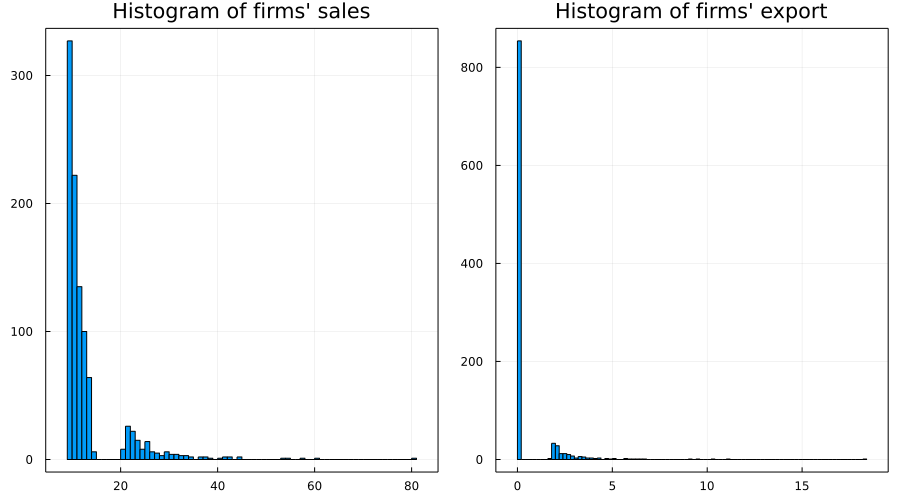

In [41]:
gr(fmt = :png, size = (900, 500))
plots = []
p1 = plot(histogram(memory."Sales"), title = "Histogram of firms' sales")
push!(plots, p1)
p2 = plot(histogram(memory."Total export"), title = "Histogram of firms' export")
push!(plots, p2)
plot(plots..., legend=false, framestyle = :box)

## 8

In [54]:
# The moments that used in each part have a value of 1 otherwise 0
function SMM(β,list; dist=1) #β = [θ, σ, f0, fx]
    Random.seed!(1395)
    A_bar=1
    P=1
    Y=100
    α = 0.5
    w=1
    τ = 0.1
    R = 1000
    Eg1 = mean(memory."Sales")
    Eg2 = mean(memory."Total export"[memory."Export" .== 1])
    Eg3 = mean(memory."Export")
    Eg4 = mean(memory."Labor"[memory."Export" .== 0])
    Eg5 = mean(memory."Profit")
    Eg6 = std(memory."Sales")
    if dist == 1
        A = rand(Pareto(β[1],A_bar),R)
    else
        A = rand(LogNormal(A_bar,β[1]),R)
    end
    p0 = [0.1,0.1]
    pd = zeros(R)
    px = zeros(R)
    πx = zeros(R)
    Firm = DataFrame()
    # for export market
    for i in 1:R
        cost(p) = w.*(((Y.*(p[1] ./ P).^(-β[2]) .+ Y.*(p[2] ./ P).^(-β[2])) ./ A[i]).^(1 ./ α)) .+ β[3] .+ β[4]
        profit(p) = p[1].*Y.*(p[1] ./ P).^(-β[2]) .+ (1 .- τ).*p[2].*Y.*(p[2] ./ P).^(-β[2]) .- cost(p)
        f(p) = -profit(p)
        Pr = Optim.minimizer(optimize(f,p0))
        pd[i] = Pr[1]
        px[i] = Pr[2]
        πx[i] = profit(Pr)
    end
    yd = Y.*(pd ./ P).^(-β[2])
    yx = Y.*(px ./ P).^(-β[2])
    lx = ((yd .+ yx) ./ A) .^ (1 ./ α)
    # for non export market
    pnx = ((β[2] ./ (β[2]-1)) .* (w ./ α) .* ((1 ./ A) .^ (1 ./ α)) .* (Y .^ ((1-α) ./ α)) .* (P .^ (β[2]*(1-α) ./ α))) .^ (α ./ (α-β[2]*(α-1)))
    ynx = Y .* ((pnx ./ P) .^ (-β[2]))
    lnx = (ynx ./ A) .^ (1 ./ α)
    πnx = pnx .* ynx - w .* lnx .- β[3]
    pr = ynx ./ lnx
    Firm."Export" = πx .> πnx
    Firm."Profit" = @. ifelse(Firm."Export" == 0, πnx, πx)
    Firm."Export" = πx .> πnx
    Firm."Total production" = @. ifelse(Firm."Export" == 0, ynx, yd.+yx)
    Firm."Total export" = @. ifelse(Firm."Export" == 0, 0, yx)
    Firm."Sales" = @. ifelse(Firm."Export" == 0, sum(ynx.*pnx), sum(yd.*pd).+ sum(yx.*px))
    Firm."Labor" = @. ifelse(Firm."Export" == 0, lnx, lx)
    m1 = mean(Firm."Sales") - Eg1
    m2 = mean(Firm."Total export"[Firm."Export" .== 1]) - Eg2
    m3 = mean(Firm."Export") - Eg3
    m4 = mean(Firm."Labor"[Firm."Export" .== 0]) - Eg4
    m5 = mean(Firm."Profit") - Eg5
    m6 = std(Firm."Sales") - Eg6
    J = list[1].*m1^2 + list[2].*m2^2 + list[3].*m3^2 + list[4].*m4^2 + list[5].*m5^2 + list[6].*m6^2
end;

In [45]:
J(β) = SMM(β,[1,1,1,1,0,0]; dist=1)
β0 = [1, 1, 1, 1]
opt = optimize(J,β0)
println("Estimated θ = $(opt.minimizer[1])")
println("Estimated σ = $(opt.minimizer[2])")
println("Estimated f0 = $(opt.minimizer[3])")
println("Estimated fx = $(opt.minimizer[4])")

Estimated θ = 3.5679633094767844
Estimated σ = 2.387432215229473
Estimated f0 = 1.6362606445158163
Estimated fx = 4.093339479110405


## 9

In [52]:
# moment5: Average of profit firm's
# moment6: Standard deviation of Sale firm's
J(β) = SMM(β,[1,1,1,1,1,1]; dist=1)
β0 = [1, 1, 1, 1]
opt = optimize(J,β0)
println("Estimated θ = $(opt.minimizer[1])")
println("Estimated σ = $(opt.minimizer[2])")
println("Estimated f0 = $(opt.minimizer[3])")
println("Estimated fx = $(opt.minimizer[4])")

Estimated θ = 3.584790735542512
Estimated σ = 2.384169562459442
Estimated f0 = 1.220506518060355
Estimated fx = 4.1141644425961825


## 10

In [57]:
J(β) = SMM(β,[1,1,1,1,1,1]; dist=2)
β0 = [0.5, 1, 1, 1]
opt = optimize(J,β0)
println("Estimated θ = $(opt.minimizer[1])")
println("Estimated σ = $(opt.minimizer[2])")
println("Estimated f0 = $(opt.minimizer[3])")
println("Estimated fx = $(opt.minimizer[4])")

Estimated θ = 0.3224655498770083
Estimated σ = 4.534520961001689
Estimated f0 = -0.2293437652791314
Estimated fx = 1.1327558493795031
